In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [32]:
# Sample Measurement entry
# first_row = session.query(Measurement).first()
# first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f85d90c4160>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [ ]:
# Sample Station entry
# first_row = session.query(Station).first()
# first_row.__dict__


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("The most recent date in the data set is:", end_date[0])

Text(0.5, 1.0, 'Precipitation over the past year')

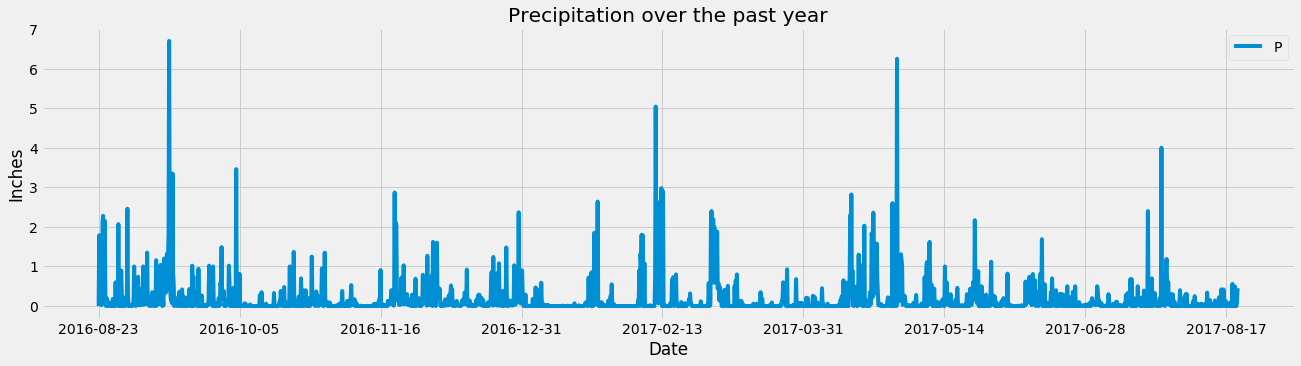

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print("One year prior, the date was:", start_date)

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= start_date).all()
# print(prcp_scores)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(prcp_scores)
precipitation_df = precipitation_df.set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df = precipitation_df.dropna()
precipitation_df.plot(figsize=(20,5))
plt.ylabel("Inches")
plt.legend('Precipitation')
plt.xlabel('Date')
plt.title('Precipitation over the past year')
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
print(f"There are a total of {station_count} stations.")

There are a total of 9 stations.


In [33]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

busy_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                                            group_by(Measurement.station).\
                                            order_by(func.count(Measurement.station).desc()).all()

busy_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
busiest = 'USC00519281'

minimum = session.query(func.min(Measurement.tobs)).filter(Measurement.station == busiest).all()
maximum = session.query(func.max(Measurement.tobs)).filter(Measurement.station == busiest).all()
average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == busiest).all()

print(f"The minimum temperature at {busiest} was {minimum[0]} degrees.")
print(f"The maximum temperature at {busiest} was {maximum[0]} degrees.")
print(f"The average temperature at {busiest} was {average[0]} degrees.")

The minimum temperature at USC00519281 was [(54.0,)] degrees.
The maximum temperature at USC00519281 was (85.0,) degrees.
The average temperature at USC00519281 was (71.66378066378067,) degrees.


<function matplotlib.pyplot.show(*args, **kw)>

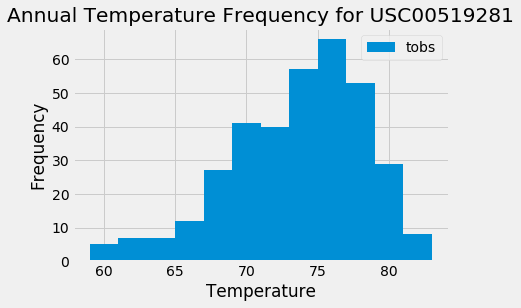

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_data = session.query(Measurement.date, Measurement.tobs). \
                filter(Measurement.date >= start_date).filter(Measurement.station == busiest).all()

year_df = pd.DataFrame(year_data)
year_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title(f"Annual Temperature Frequency for {busiest}")
plt.show

# Close session

In [ ]:
# Close Session
session.close()